In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
import folium
import json
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'Malgun Gothic')

In [2]:
data = pd.read_csv('./1_danawa_crawling_result.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     400 non-null    object
 1   스펙목록    400 non-null    object
 2   가격      400 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


,상품명,스펙목록,가격
0,베이스어스 차량용 청소기 A3 (해외구매),"차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...",47510
1,LG전자 오브제컬렉션 코드제로 A9S AU9982,핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이...,1019160
2,샤오미 미지아 차량용 핸디 무선 청소기 (해외구매),"차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필...",38990
3,LG전자 오브제컬렉션 코드제로 A9S AU9882,핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이...,894400
4,삼성전자 비스포크 제트 VS20A956A3,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 210W / [구성] 바닥 / 솔...,492190


# 1. 회사명 모델명 분리

In [3]:
company_list = []
product_list = []
for title in data['상품명']:
    title_info = title.split(' ',1)
    company_name = title_info[0]
    product_name = title_info[1]
    company_list.append(company_name)
    product_list.append(product_name)

# 2. 스펙목록에서 카테고리 사용시간  흡입력 추출

In [4]:
data['스펙목록']

0      차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...
1      핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이...
2      차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필...
3      핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이...
4      핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 210W / [구성] 바닥 / 솔...
                             ...                        
395    차량용청소기 / 무선 / 흡입력: 14,000Pa / 추가노즐: 틈새, 솔브러쉬 /...
396    핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 210W / [구성] 바닥...
397    핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 200W / [구성] 바닥 / 솔...
398    물걸레청소기 / 롤러식 / 물걸레+진공 / 무선형 / [배터리] 리튬이온 (분리형)...
399    핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 210W / [구성] 바닥...
Name: 스펙목록, Length: 400, dtype: object

In [5]:
spec_list = data['스펙목록'][0].split(' / ')
spec_list

['차량용청소기',
 '무선',
 '흡입력: 15,000Pa',
 '최대출력: 135W',
 '헤파필터',
 '추가노즐: 틈새, 솔브러쉬',
 'LED라이트',
 '사용시간: 45분',
 '배터리 잔량표시',
 '소음: 75dB',
 '충전방식: USB C타입',
 '충전시간: 3~5시간',
 '색상: 블랙, 실버',
 '크기: 296x56.5mm']

In [6]:
# 카테고리 정보 추출
category = spec_list[0]
category

'차량용청소기'

In [7]:
for spec in spec_list:
    if '사용시간' in spec:
        use_time_spec = spec
    elif '흡입력' in spec:
        suction_spec = spec
print(use_time_spec)
print(suction_spec)

사용시간: 45분
흡입력: 15,000Pa


In [8]:
use_time_value = use_time_spec.split(' ')[1].strip()
use_time_value

'45분'

In [9]:
suction_value = suction_spec.split(' ')[1].strip()
suction_value

'15,000Pa'

In [10]:
# 카테고리, 사용시간, 흡입력
category_list = []
use_time_list = []
suction_list = []
for spec_data in data['스펙목록']:
    spec_list = spec_data.split(' / ')
    category = spec_list[0]
    category_list.append(category)
    # 사용시간/흡입력
    use_time_value = None
    suction_value = None
    for spec in spec_list:
        if '사용시간' in spec:
            use_time_value = spec.split(' ')[1].strip()
        elif '흡입력' in spec:
            suction_value = spec.split(' ')[1].strip()
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

In [11]:
print('카테고리: ', len(category_list), category_list[0:5])
print('사용시간: ', len(use_time_list), use_time_list[0:5])
print('흡입력: ', len(suction_list), suction_list[0:5])

카테고리:  400 ['차량용청소기', '핸디스틱청소기', '차량용청소기', '핸디스틱청소기', '핸디스틱청소기']
사용시간:  400 ['45분', '1시간', '9~30분', '1시간', '1시간']
흡입력:  400 ['15,000Pa', '220W', '13,000Pa', '220W', '210W']


# 3. 무선청소기 사용시간 통일

In [12]:
def convert_time_minute(time):
    try:
        if '시간' in time:
            hour = time.split('시간')[0] # 1시간 20분 = 1
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0] # 1시간 20분 = 20
            else:
                minute = 0
        else:
            hour = 0
            minute = time.split('분')[0]
        return int(hour) * 60 + int(minute)
    except:
        return None

In [13]:
new_use_time_list = []
for time in use_time_list:
    value = convert_time_minute(time)
    new_use_time_list.append(value)
print(len(new_use_time_list))
print(new_use_time_list[:10])

400
[45, 60, None, 60, 60, 45, 60, 35, 60, 60]


# 4. 무선 청소기 흡입력 단위 통일

In [14]:
# w는 지우고 pa는 100으로 나눠서 단위를 통일
def get_suction(value):
    try:
        value = value.upper()
        if 'AW' in value or "W" in value:
            result = value.replace('A','').replace("W","")
            returl = int(result.replace(',',''))
        elif 'PA' in value:
            result = value.replace('PA',"")
            result = int(int(result.replace(',', '')) / 100)
        else:
            result=None
        return result
    except:
        return None

In [15]:
suc = ['15,000Pa', '220W', '13,000Pa', '220W', '210W']
for su in suc:
    suc_va = get_suction(su)
    print(suc_va)

150
220
130
220
210


In [16]:
new_suction_list = []
for power in suction_list:
    value = get_suction(power)
    new_suction_list.append(value)
print(len(new_suction_list))
print(new_suction_list[:10])

400
[150, '220', 130, '220', '210', 100, '210', None, '220', '210']


# 5. 전처리 결과를 엑셀로 저장

In [17]:
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격']
pd_data['사용시간'] = new_use_time_list
pd_data['흡입력'] = new_suction_list
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,차량용청소기,베이스어스,차량용 청소기 A3 (해외구매),47510,45.0,150
1,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9982,1019160,60.0,220
2,차량용청소기,샤오미,미지아 차량용 핸디 무선 청소기 (해외구매),38990,NaN,130
3,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9882,894400,60.0,220
4,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,492190,60.0,210


In [18]:
pd_data.to_csv('result_preprocessing.csv', index=False)

In [19]:
pd_data['카테고리'].value_counts()

핸디스틱청소기             214
차량용청소기               92
핸디청소기                39
물걸레청소기               30
욕실청소기                 8
업소용청소기                6
스틱청소기                 4
핸디/스틱청소기+로봇청소기세트      4
침구청소기                 2
물걸레청소기+스팀청소기          1
Name: 카테고리, dtype: int64

In [20]:
pd_data_final = pd_data[pd_data['카테고리'].isin(['핸디스틱청소기'])]
pd_data_final

,카테고리,회사명,제품,가격,사용시간,흡입력
1,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9982,1019160,60.0,220
3,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9882,894400,60.0,220
4,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,492190,60.0,210
6,핸디스틱청소기,LG전자,코드제로 A9S AT9271,633330,60.0,210
7,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3512IG,184270,35.0,None
...,...,...,...,...,...,...
388,핸디스틱청소기,일렉트로룩스,ZB3302AK,189000,42.0,None
394,핸디스틱청소기,로헨,L30,169000,50.0,350
396,핸디스틱청소기,삼성전자,비스포크 제트 VS20A957E2,708990,60.0,210
397,핸디스틱청소기,삼성전자,제트 VS20T9253QD,417600,60.0,200


In [21]:
pd_data_final['가격'].value_counts()

199000     4
169000     4
195000     3
299000     3
179000     2
          ..
375967     1
1135240    1
800020     1
569990     1
875970     1
Name: 가격, Length: 202, dtype: int64

In [22]:
pd_data_final['가격'].unique()

array([1019160,  894400,  492190,  633330,  184270,  605950,  756710,
        183710,  381650,  525990,  595850,  478710,  520830,  556980,
        805450,  766110,  169000,  592050,  571000,  807700,  378900,
        269000,  394740,  166230,  785570,  897380,  575930,  446220,
        165710,  156860,  663980,  636980,  182860,  305290,  197490,
        552360,  299000, 1225460,  234190,  587270,  168290,  751600,
       1180800,  599430,  305970,  179000,  735980,  615670,  196570,
        703870, 1185790,  584620,  791930,  899230,  109970,  706200,
        221790,  518840,  368110,  199440,  139000,  199000,  349000,
        248000,  601130,  583860,  195000,   75800, 1515400,   46650,
         41900,   87900,  730800,  375967, 1135240,  800020,  569990,
         74970,  668900,  482460,  745610,  736900,  227190,  695110,
        139410,  245100,  217500,   79000,   48070,  170100,   93980,
        595660,  409380,  299990,   78970,  258990,  421030,  232310,
        454090,  294

In [23]:
pd_data_final.to_csv('2_result_preprocessing.csv', index=False)

# 데이터 다시 불러오기

In [24]:
pd_data_final = pd.read_csv('2_result_preprocessing.csv')

# 6. 흡입력 기준 정렬

In [25]:
pd_data_final.isnull().sum()

카테고리     0
회사명      0
제품       0
가격       0
사용시간    10
흡입력     64
dtype: int64

In [26]:
top_list = pd_data_final.sort_values(['흡입력'], ascending=False)
top_list

,카테고리,회사명,제품,가격,사용시간,흡입력
34,핸디스틱청소기,DIBEA,차이슨 ALLNEW22000 스노우화이트,197490,40.0,400.0
64,핸디스틱청소기,DIBEA,차이슨 ALLNEW29000,248000,48.0,390.0
93,핸디스틱청소기,행커,400W,170100,60.0,390.0
62,핸디스틱청소기,에어메이드,스마트포스 AMC-3500,199000,45.0,370.0
210,핸디스틱청소기,로헨,L30,169000,50.0,350.0
...,...,...,...,...,...,...
198,핸디스틱청소기,일렉트로룩스,얼티밋홈 700 EFS71423,569860,53.0,NaN
199,핸디스틱청소기,보랄,큐텐 BR-Q390RV,62800,NaN,NaN
200,핸디스틱청소기,신일전자,SVC-DC2200SK,125400,35.0,NaN
202,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3311,238990,48.0,NaN


In [27]:
top_list2 = pd_data_final.sort_values(['사용시간'], ascending=False)
top_list2

,카테고리,회사명,제품,가격,사용시간,흡입력
76,핸디스틱청소기,샤오미,드리미 V12,375967,90.0,270.0
7,핸디스틱청소기,샤오미,드리미 V11,183710,90.0,250.0
131,핸디스틱청소기,삼성전자,비스포크 제트 AI VS25C972DR,1439910,80.0,250.0
69,핸디스틱청소기,삼성전자,비스포크 제트 AI VS28C973ES,1515400,80.0,280.0
106,핸디스틱청소기,삼성전자,비스포크 제트 AI VS28C973DR,1499990,80.0,280.0
...,...,...,...,...,...,...
127,핸디스틱청소기,샤오미,드리미 T30,399000,NaN,270.0
169,핸디스틱청소기,코슬리,스위트 KV-17IV,89000,NaN,170.0
187,핸디스틱청소기,아이룸,트윈파워 MAX,145000,NaN,NaN
194,핸디스틱청소기,보만,VC7210,49790,NaN,NaN


In [28]:
top_list3 = pd_data_final.sort_values(['사용시간', '흡입력'], ascending=False)
top_list3.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
76,핸디스틱청소기,샤오미,드리미 V12,375967,90.0,270.0
7,핸디스틱청소기,샤오미,드리미 V11,183710,90.0,250.0
69,핸디스틱청소기,삼성전자,비스포크 제트 AI VS28C973ES,1515400,80.0,280.0
106,핸디스틱청소기,삼성전자,비스포크 제트 AI VS28C973DR,1499990,80.0,280.0
159,핸디스틱청소기,삼성전자,비스포크 제트 AI VS28C973GSK,1579990,80.0,280.0


In [29]:
# 평균값 정리
price_mean_value = pd_data_final['가격'].mean()
suction_mean_value = pd_data_final['흡입력'].mean()
use_time_mean_value = pd_data_final['사용시간'].mean()
print('가격 평균 : ', price_mean_value)
print('흡입력 평균 : ', suction_mean_value)
print('사용시간 평균 : ', use_time_mean_value)

가격 평균 :  400043.40654205607
흡입력 평균 :  203.94666666666666
사용시간 평균 :  49.61274509803921


In [30]:
# 가성비 좋은 제품 선택
# 가격이 평균이하고, 흡입력, 사용시간이 평균보다 높으면
condition_data = pd_data_final[(pd_data_final['가격'] <= price_mean_value) & (pd_data_final['흡입력'] >=  suction_mean_value) & (pd_data_final['사용시간'] >= use_time_mean_value)]
len(condition_data)

18

# 7. 데이터 시각화

In [31]:
chart_data = pd_data_final.dropna(axis=0)
len(chart_data)

147

In [32]:
# 흡입력, 사용시간의 최댓값과 최소값 정리
suction_max_value = chart_data['흡입력'].max()
suction_min_value = chart_data['흡입력'].min()
use_time_max_value = chart_data['사용시간'].max()
use_time_min_value = chart_data['사용시간'].min()

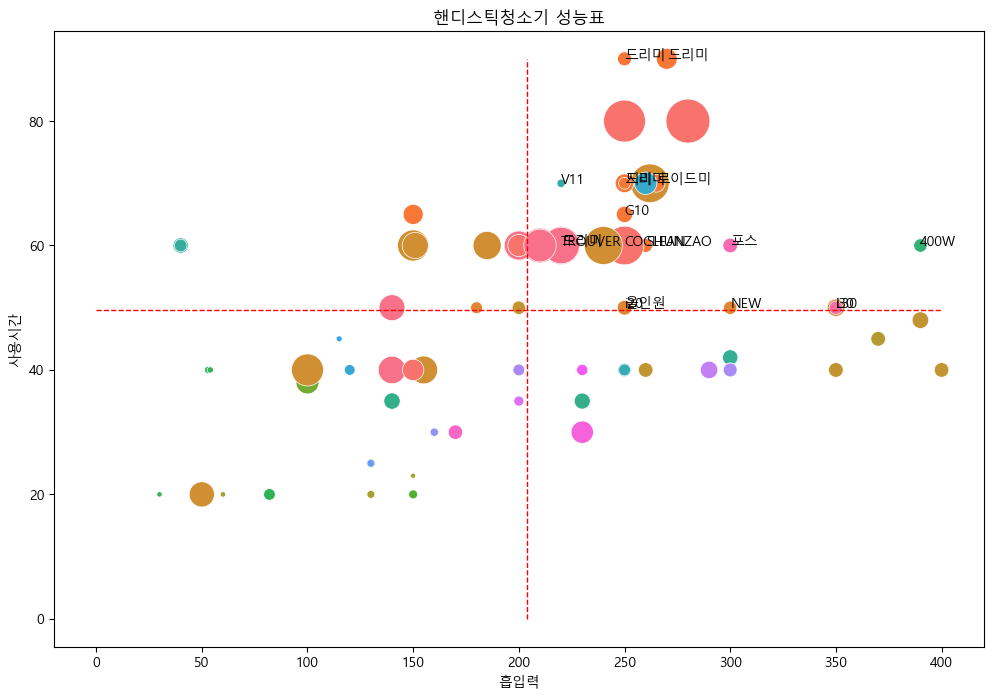

In [38]:
# 청소기 성능 시각화
plt.figure(figsize=(12,8))
plt.title("핸디스틱청소기 성능표")
sns.scatterplot(x='흡입력' , y='사용시간' , size='가격', hue = chart_data['회사명'],
                data=chart_data, sizes=(10, 1000), legend = False)
plt.plot([0, suction_max_value], [use_time_mean_value, use_time_mean_value],
        'r--', lw=1)
plt.plot([suction_mean_value, suction_mean_value], [0, use_time_max_value],
        'r--', lw=1)

for index, row in condition_data.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=10)
plt.show()